In [1]:
import gensim.models as g
import sys
import codecs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
doc2vec_dir="model/enwiki_dbow/doc2vec.bin"
word2vec_dir="./model/GoogleNews-vectors-negative300.bin"

# Word2Vec Minimal Example

In [3]:
# Load Google's pre-trained Word2Vec model.
word_vectors = g.KeyedVectors.load_word2vec_format(word2vec_dir, binary=True)  

In [4]:
# Find a word similar to woman, king but not to man
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [5]:
test_words = [ "king", "queen", "man", "woman", "male", "female" ]

In [6]:
# Find word vectors for test_words
word_weights = []
for w in test_words:
    word_weights.append(word_vectors[w])

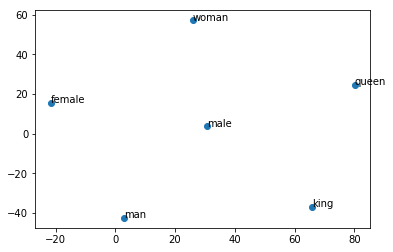

In [7]:
# Reduce dimension and plot them
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(word_weights)

plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(test_words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

# Doc2Vec Minimal Example

In [8]:
#inference hyper-parameters
start_alpha=0.01
infer_epoch=1000

#load model
doc2vec_model = g.Doc2Vec.load(doc2vec_dir)

In [9]:
test_docs = [    
    "That item is mine.",
    "Fox jumped over the fence.",
    "The accuracy is reported.",
    "I don't like you.",
    "How are you doing?",
    "Who's the first president of the United States?",
    "Who's the second president of Harvard University?"
]

# test_docs = [
#     "That item is mine.",
#     "He stepped on a mine.",
#     "She found gold in a mine.",
#     "That gold is mine.",
#     "She found it in a mine.",
#     "He stepped in a mine.",
#     "Which of these gold items is mine?",
#     "Did he find it in a mine?",
#     "She stepped in a mine."
# ]

In [10]:
# Find doc vectors for test_docs
doc_weights = []
for d in test_docs:
    doc_weights.append(doc2vec_model.infer_vector(d, alpha=start_alpha, steps=infer_epoch))

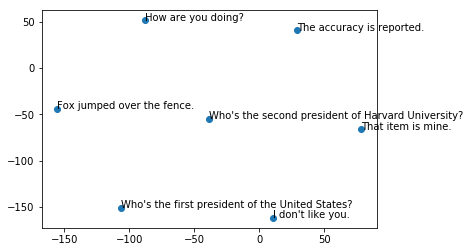

In [11]:
# Reduce dimension and plot them
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(doc_weights)

plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(test_docs, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()